### Project 1

# GLOBAL NATURAL DISASTERS - A 40+ YEAR ANALYSIS

---
### <strong>Analysts: Hossein Falsafi, Hieu Lam, Ryan James, and Dominique Spencer</strong>

---
### Import Dependencies and Setup

In [45]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import hvplot.pandas
from pathlib import Path
from pprint import pprint
from citipy import citipy

# Import API key
from api_keys import weather_api_key

### Load the CSV file 

In [46]:
csv_file = Path("Resources/1979-2023.csv")
disaster_data = pd.read_csv(csv_file,low_memory=False)

# Display sample data
disaster_data.head()

,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,...,"Reconstruction Costs, Adjusted ('000 US$)",Insured Damages ('000 US$),"Insured Damages, Adjusted ('000 US$)",Total Damages ('000 US$),"Total Damages, Adjusted ('000 US$)",CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1979-0094-GTM,1979,94,NaN,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,24.798841,NaN,NaN,NaN,NaN
1,1979-0113-COL,1979,113,NaN,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,...,NaN,NaN,NaN,8000.0,32260.0,24.798841,NaN,NaN,NaN,NaN
2,1979-9200-HKG,1979,9200,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,24.798841,NaN,NaN,NaN,NaN
3,1979-0185-AIA,1979,185,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,Frederic,...,NaN,NaN,NaN,NaN,NaN,24.798841,NaN,NaN,NaN,NaN
4,1979-0039-ALB,1979,39,NaN,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,24.798841,NaN,NaN,NaN,NaN


----------------
## Clean dataset

<strong>The sections of code in this section are as follows:</strong>

1. Rename certain columns to enable .drop() function to work in step 2
2. Perform .drop() function on columns we don't need
3. Check for duplicates
4. Delete NaN values from Latitude, Longitude and Start Day columns
5. Convert Start Month and Start Day columns to integers
6. Remove 'N', 'S', 'E', 'W' characters from Latitudes and Longitudes
7. Print new DataFrame to reflect this code

In [47]:
# Rename columns containing USD to remove ' symbol as it interfers with the code
disaster_data = disaster_data.rename(columns={"Dis No": "Disaster Number", "AID Contribution ('000 US$)": "AID Contribution (,000 US$)", "Reconstruction Costs ('000 US$)": "Reconstruction Costs (,000 US$)",
                                             "Reconstruction Costs, Adjusted ('000 US$)": "Reconstruction Costs, Adjusted (,000 US$)", "Insured Damages ('000 US$)": "Insured Damages (,000 US$)",
                                             "Insured Damages, Adjusted ('000 US$)": "Insured Damages, Adjusted (,000 US$)", "Total Damages ('000 US$)": "Total Damages (,000 US$)",
                                             "Total Damages, Adjusted ('000 US$)": "Total Damages, Adjusted (,000 US$)"})

# Delete unwanted columns but maintain original copy
disaster_data = disaster_data.drop(columns=['Seq', 'Glide', 'Disaster Subtype', 'Disaster Subsubtype',
                                            'Event Name', 'Origin', 'Location', 'Associated Dis', 'Associated Dis2',
                                            'OFDA Response', 'Appeal', 'Declaration', 'AID Contribution (,000 US$)', 
                                            'Dis Mag Value', 'Dis Mag Scale', 'Local Time', 'River Basin', 'Start Year',
                                            'End Month', 'End Year', 'End Day', 'No Injured', 'No Affected', 'No Homeless', 'Total Affected',
                                            'Reconstruction Costs (,000 US$)', 'Reconstruction Costs, Adjusted (,000 US$)',
                                            'Insured Damages (,000 US$)', 'Insured Damages, Adjusted (,000 US$)', 'Total Damages (,000 US$)',
                                            'Total Damages, Adjusted (,000 US$)', 'CPI', 'Adm Level', 'Admin1 Code', 'Admin2 Code',
                                            'Geo Locations'], inplace=False)

# Check for duplicates
disaster_data['Disaster Number'].nunique() # there are none - needs double checking though!

disaster_data.to_csv("Resources/disasterdata.csv")

# Delete NaN values from Lat & Lon columns
filtered_df = disaster_data.dropna(subset=['Latitude', 'Longitude', 'Start Day']) # Returns 2277 rows out of 23252 rows

# Convert Start Month and Start Day columns to integers
filtered_df = filtered_df.astype({"Start Month": "int", "Start Day": "int"})

# Remove message warning for below because it's v distracting lol
pd.options.mode.chained_assignment=None

# # Remove 'N', 'S', 'E', 'W' characters from Latitudes...
# filtered_df['Latitude'] = filtered_df['Latitude'].astype(str).str.rstrip("N")
# filtered_df['Latitude'] = filtered_df['Latitude'].astype(str).str.rstrip("S")
# filtered_df['Latitude'] = filtered_df['Latitude'].astype(str).str.rstrip("E")
# filtered_df['Latitude'] = filtered_df['Latitude'].astype(str).str.rstrip("W")

# # and Longitudes...
# filtered_df["Longitude"] = filtered_df["Longitude"].astype(str).str.rstrip("N")
# filtered_df["Longitude"] = filtered_df["Longitude"].astype(str).str.rstrip("S")
# filtered_df["Longitude"] = filtered_df["Longitude"].astype(str).str.rstrip("E")
# filtered_df["Longitude"] = filtered_df["Longitude"].astype(str).str.rstrip("W")
filtered_df['Latitude']=filtered_df['Latitude'].str.replace(r'[^0-9.]', '', regex=True)
filtered_df['Longitude']=filtered_df['Longitude'].str.replace(r'[^0-9.]', '',regex=True)
filtered_df['Latitude'] = filtered_df['Latitude'].str.replace(r'^(\d+\.\d+).*', r'\1')
filtered_df['Longitude'] = filtered_df['Longitude'].str.replace(r'^(\d+\.\d+).*', r'\1')
# Display new DataFrame
filtered_df



C:\Users\mh30f\AppData\Local\Temp\ipykernel_19968\2380678864.py:45: FutureWarning: The default value of regex will change from True to False in a future version.
  filtered_df['Latitude'] = filtered_df['Latitude'].str.replace(r'^(\d+\.\d+).*', r'\1')
C:\Users\mh30f\AppData\Local\Temp\ipykernel_19968\2380678864.py:46: FutureWarning: The default value of regex will change from True to False in a future version.
  filtered_df['Longitude'] = filtered_df['Longitude'].str.replace(r'^(\d+\.\d+).*', r'\1')


,Disaster Number,Year,Disaster Group,Disaster Subgroup,Disaster Type,Country,ISO,Region,Continent,Latitude,Longitude,Start Month,Start Day,Total Deaths
0,1979-0094-GTM,1979,Natural,Geophysical,Earthquake,Guatemala,GTM,Central America,Americas,14.321,90.082,10,9,NaN
1,1979-0113-COL,1979,Natural,Geophysical,Earthquake,Colombia,COL,South America,Americas,1.598,79.358,12,12,579.0
4,1979-0039-ALB,1979,Natural,Geophysical,Earthquake,Albania,ALB,Southern Europe,Europe,42.096,19.209,4,15,35.0
22,1979-0063-CHN,1979,Natural,Geophysical,Earthquake,China,CHN,Eastern Asia,Asia,31.452,119.241,7,9,42.0
23,1979-0082-CHN,1979,Natural,Geophysical,Earthquake,China,CHN,Eastern Asia,Asia,41.145,108.129,8,25,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23190,2023-0189-PNG,2023,Natural,Geophysical,Earthquake,Papua New Guinea,PNG,Melanesia,Oceania,4.326,143.159,4,2,8.0
23203,2023-0054-SYR,2023,Natural,Geophysical,Earthquake,Syrian Arab Republic,SYR,Western Asia,Asia,38.055,36.51,2,6,4500.0
23204,2023-0091-SYR,2023,Natural,Geophysical,Earthquake,Syrian Arab Republic,SYR,Western Asia,Asia,36.159,36.034,2,20,NaN
23212,2023-0237-TJK,2023,Natural,Geophysical,Earthquake,Tajikistan,TJK,Central Asia,Asia,39.383,69.881,3,23,NaN


----------------
## Code to create parameteres that comply with API request requirements
### According to OpenWeatherAPI website, it should look like this: 
https://history.openweathermap.org/data/3.0/history/timemachine?lat={lat}&lon={lon}&dt={dt}&appid={api_key}

<strong>The sections of code in this section are as follows:</strong>

1. Import relevent dependencies
2. Create new columns for Full Date and Unix Timestamp conversions
3. Code to populate Full Date column (based off data that exists in our DataFrame)
4. Code to convert Full Date values to Unix Timestamps, then populate new Unix Timestamp column
5. Display new DataFrame to reflect these changes

In [48]:
import time
import datetime

filtered_df['Full Date'] = ""
filtered_df['Unix Timestamp'] = ""

for index, row in filtered_df.iterrows():
    date = f"{row['Start Day']}/{row['Start Month']}/{row['Year']}"
    filtered_df.loc[index,'Full Date'] = date

for index, row in filtered_df.iterrows():
    full_date = f"{row['Full Date']}"
    unix = (datetime.datetime.strptime(full_date, "%d/%m/%Y").timestamp())
    filtered_df.loc[index,'Unix Timestamp'] = unix

filtered_df

,Disaster Number,Year,Disaster Group,Disaster Subgroup,Disaster Type,Country,ISO,Region,Continent,Latitude,Longitude,Start Month,Start Day,Total Deaths,Full Date,Unix Timestamp
0,1979-0094-GTM,1979,Natural,Geophysical,Earthquake,Guatemala,GTM,Central America,Americas,14.321,90.082,10,9,NaN,9/10/1979,308246400.0
1,1979-0113-COL,1979,Natural,Geophysical,Earthquake,Colombia,COL,South America,Americas,1.598,79.358,12,12,579.0,12/12/1979,313776000.0
4,1979-0039-ALB,1979,Natural,Geophysical,Earthquake,Albania,ALB,Southern Europe,Europe,42.096,19.209,4,15,35.0,15/4/1979,292953600.0
22,1979-0063-CHN,1979,Natural,Geophysical,Earthquake,China,CHN,Eastern Asia,Asia,31.452,119.241,7,9,42.0,9/7/1979,300297600.0
23,1979-0082-CHN,1979,Natural,Geophysical,Earthquake,China,CHN,Eastern Asia,Asia,41.145,108.129,8,25,NaN,25/8/1979,304358400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23190,2023-0189-PNG,2023,Natural,Geophysical,Earthquake,Papua New Guinea,PNG,Melanesia,Oceania,4.326,143.159,4,2,8.0,2/4/2023,1680364800.0
23203,2023-0054-SYR,2023,Natural,Geophysical,Earthquake,Syrian Arab Republic,SYR,Western Asia,Asia,38.055,36.51,2,6,4500.0,6/2/2023,1675612800.0
23204,2023-0091-SYR,2023,Natural,Geophysical,Earthquake,Syrian Arab Republic,SYR,Western Asia,Asia,36.159,36.034,2,20,NaN,20/2/2023,1676822400.0
23212,2023-0237-TJK,2023,Natural,Geophysical,Earthquake,Tajikistan,TJK,Central Asia,Asia,39.383,69.881,3,23,NaN,23/3/2023,1679500800.0


### Generate the Cities List by Using the `citipy` Library

In [49]:
# Empty list for holding the latitude and longitude combinations

lat_lngs = []

# Empty list for holding the cities names
cities = []
latitudes = []
longitudes = []
cities = []
disaster_types = []
disaster_subgroups = []
disaster_groups = []

# Create a set of random lat and lng combinations

lats=pd.to_numeric(filtered_df['Latitude'])
lngs=pd.to_numeric(filtered_df['Longitude'])
lat_lngs = zip(lats, lngs)
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    # if city not in cities:
    cities.append(city)
    

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 2277


### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the above code for the desired stampdate

In [40]:
# # Set the API base URL
# url = "https://api.openweathermap.org/data/2.5/weather?"

# # Define an empty list to fetch the weather data for each city
# main_data = []
# units = "metric"

# # Print to logger
# print("Beginning Data Retrieval     ")
# print("-----------------------------")

# # Limit the loop to the first 200 pairs of city and desired_timestamp
# filtered_df1 = filtered_df.iloc[:2277].reset_index(drop=True)
# # Loop through all the cities in our list to fetch weather data
# for i, (city, desired_timestamp) in enumerate(zip(cities, filtered_df1['Unix Timestamp'])):
    
#     # Create endpoint URL with each city
#     city_url = f"{url}&q={city}&appid={weather_api_key}&units={units}&dt={desired_timestamp}"

#     # Run an API request for each of the cities
#     try:
#         # Parse the JSON and retrieve data
#         response = requests.get(city_url)
#         city_weather = response.json()
        
#         # Parse out latitude, longitude, max temp, country, and date
#         main_lat = city_weather['coord']['lat']
#         main_lng = city_weather['coord']['lon']
#         main_max_temp = city_weather['main']['temp_max']
#         main_country = city_weather['sys']['country']
#         main_date = city_weather['dt']
        
#         # Append the City information into city_data list
#         main_data.append({"Year": filtered_df1.loc[i,'Year'],
#                           "Full Date": filtered_df1.loc[i,'Full Date'],
#                           "Date": main_date,
#                           "Start Month":filtered_df1.loc[i,'Start Month'],
#                           "City": city, 
#                           "Country": main_country,
#                           "Lat": main_lat, 
#                           "Lng": main_lng, 
#                           "Max Temp": main_max_temp,
#                           "Disaster Group": filtered_df1.loc[i,'Disaster Group'],
#                           "Disaster Subgroup": filtered_df1.loc[i,'Disaster Subgroup'],
#                           "Disaster Type": filtered_df1.loc[i,'Disaster Type'],
#                           "Region": filtered_df1.loc[i,'Region'],
#                           "Continent": filtered_df1.loc[i,'Continent'],
#                           "Total Deaths": filtered_df1.loc[i,'Total Deaths']                                                    
#                           })

#     # If an error is experienced, skip the city and Temp add a placeholder value
#     except:
#         main_data.append({"Year": filtered_df1.loc[i,'Year'],
#                           "Full Date": filtered_df1.loc[i,'Full Date'],
#                           "Date": filtered_df1.loc[i,'Unix Timestamp'],
#                           "Start Month":filtered_df1.loc[i,'Start Month'],
#                           "City": "N/A", 
#                           "Country": filtered_df1.loc[i,'Country'],
#                           "Lat": filtered_df1.loc[i,'Latitude'], 
#                           "Lng": filtered_df1.loc[i,'Longitude'], 
#                           "Max Temp": "N/A",
#                           "Disaster Group": filtered_df1.loc[i,'Disaster Group'],
#                           "Disaster Subgroup": filtered_df1.loc[i,'Disaster Subgroup'],
#                           "Disaster Type": filtered_df1.loc[i,'Disaster Type'],
#                           "Region": filtered_df1.loc[i,'Region'],
#                           "Continent": filtered_df1.loc[i,'Continent'],
#                           "Total Deaths": filtered_df1.loc[i,'Total Deaths']                                                    
#                           })
# print("-----------------------------")
# print("Data Retrieval Complete      ")
# print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
-----------------------------
Data Retrieval Complete      
-----------------------------


In [41]:
# #Convert main data int a Pandas DataFrame
# main_data_df=pd.DataFrame(main_data)
# # Display sample data
# main_data_df = main_data_df[main_data_df['Max Temp'] != 'N/A']
# main_data_df.sort_values(by='Year', ascending=True, inplace=True)
# main_data_df

,Year,Full Date,Date,Start Month,City,Country,Lat,Lng,Max Temp,Disaster Group,Disaster Subgroup,Disaster Type,Region,Continent,Total Deaths
0,1979,9/10/1979,1.693991e+09,10,bamboo flat,IN,11.7,92.7167,29.05,Natural,Geophysical,Earthquake,Central America,Americas,NaN


In [ ]:
# # Export the Main_Data into a csv
# main_data_df.to_csv("Resources/maindata.csv")

# # Display sample data
# main_data_df

,Unnamed: 0,Year,Full Date,Date,Start Month,City,Country,Lat,Lng,Max Temp,Disaster Group,Disaster Subgroup,Disaster Type,Region,Continent,Total Deaths
0,0,1979,9/10/1979,1.693991e+09,10,bamboo flat,IN,11.7,92.7167,29.05,Natural,Geophysical,Earthquake,Central America,Americas,NaN


In [50]:
csv_file = Path("Resources/maindata.csv")
main_data_df = pd.read_csv(csv_file,low_memory=False)

# Display sample data
main_data_df

,Unnamed: 0,Year,Full Date,Date,Start Month,City,Country,Lat,Lng,Max Temp,Disaster Group,Disaster Subgroup,Disaster Type,Region,Continent,Total Deaths
0,0,1979,9/10/1979,1693825717,10,bamboo flat,IN,11.7000,92.7167,28.05,Natural,Geophysical,Earthquake,Central America,Americas,NaN
1,54,1979,12/09/1979,1693825735,9,manokwari,ID,-0.8667,134.0833,26.02,Natural,Geophysical,Earthquake,South-Eastern Asia,Asia,2.0
2,65,1979,14/03/1979,1693825738,3,loei,TH,17.4167,101.5000,21.87,Natural,Geophysical,Earthquake,Central America,Americas,5.0
3,139,1979,24/05/1979,1693825764,5,budva,ME,42.2864,18.8400,26.97,Natural,Geophysical,Earthquake,Southern Europe,Europe,NaN
4,2214,1979,18/07/1979,1693826430,7,dursunbey,TR,39.5860,28.6257,27.30,Natural,Geophysical,Earthquake,Western Asia,Asia,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2161,2264,2023,6/05/2023,1693826446,5,nanao,JP,37.0500,136.9667,29.07,Natural,Geophysical,Earthquake,Eastern Asia,Asia,1.0
2162,2263,2023,6/02/2023,1693826446,2,goksun,TR,38.0210,36.4973,25.99,Natural,Geophysical,Earthquake,Western Asia,Asia,50096.0
2163,2246,2023,21/03/2023,1693826440,3,jurm,AF,36.8648,70.8342,25.31,Natural,Geophysical,Earthquake,Southern Asia,Asia,5.0
2164,2268,2023,18/01/2023,1693826448,1,khowy,IR,38.5503,44.9521,36.29,Natural,Geophysical,Earthquake,Southern Asia,Asia,NaN


---
## 1.	What is the influence of geographic coordinates on the frequency of natural disasters?

Count number of natural disasters relating to different cities (aka Lat & Lon from Geofy API)

Dataframe that includes cities, number of disasters

Bar charts

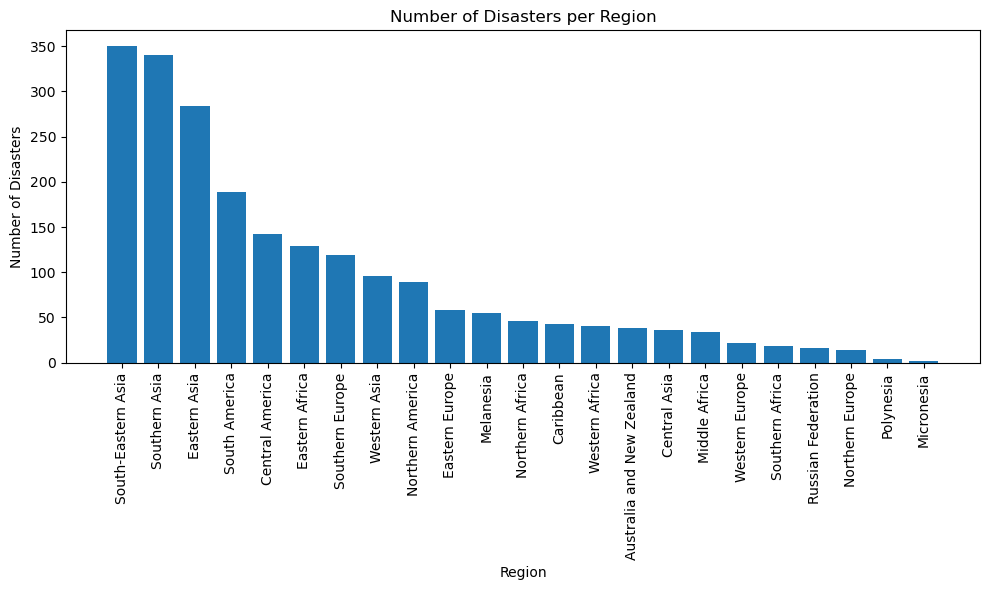

In [10]:
# Group the data by 'City' and count the number of disasters in each city
disaster_counts = main_data_df['Region'].value_counts()

# Create a bar chart
plt.figure(figsize=(10,6))  # Adjust the figure size as needed
plt.bar(disaster_counts.index, disaster_counts.values)
plt.xticks(rotation=45)
plt.xlabel('Region')
plt.ylabel('Number of Disasters')
plt.title('Number of Disasters per Region')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

---
## 2.	Does the Northern or Southern Hemisphere experience greater or fewer natural disasters?

Scatterplots for Northern & Southern hemispheres (like challenge 6) - based on Question 1 dataframe

In [11]:
northern_hemi_df=main_data_df[main_data_df['Lat'] >= 0]
ndisaster_counts = northern_hemi_df['Region'].value_counts().sort_values(ascending=True)
northern_hemi_df

,Unnamed: 0,Year,Full Date,Date,Start Month,City,Country,Lat,Lng,Max Temp,Disaster Group,Disaster Subgroup,Disaster Type,Region,Continent,Total Deaths
0,0,1979,9/10/1979,1693825717,10,bamboo flat,IN,11.7000,92.7167,28.05,Natural,Geophysical,Earthquake,Central America,Americas,NaN
2,65,1979,14/03/1979,1693825738,3,loei,TH,17.4167,101.5000,21.87,Natural,Geophysical,Earthquake,Central America,Americas,5.0
3,139,1979,24/05/1979,1693825764,5,budva,ME,42.2864,18.8400,26.97,Natural,Geophysical,Earthquake,Southern Europe,Europe,NaN
4,2214,1979,18/07/1979,1693826430,7,dursunbey,TR,39.5860,28.6257,27.30,Natural,Geophysical,Earthquake,Western Asia,Asia,NaN
5,138,1979,15/04/1979,1693825718,4,bar,UA,49.0772,27.6826,14.42,Natural,Geophysical,Earthquake,Southern Europe,Europe,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2161,2264,2023,6/05/2023,1693826446,5,nanao,JP,37.0500,136.9667,29.07,Natural,Geophysical,Earthquake,Eastern Asia,Asia,1.0
2162,2263,2023,6/02/2023,1693826446,2,goksun,TR,38.0210,36.4973,25.99,Natural,Geophysical,Earthquake,Western Asia,Asia,50096.0
2163,2246,2023,21/03/2023,1693826440,3,jurm,AF,36.8648,70.8342,25.31,Natural,Geophysical,Earthquake,Southern Asia,Asia,5.0
2164,2268,2023,18/01/2023,1693826448,1,khowy,IR,38.5503,44.9521,36.29,Natural,Geophysical,Earthquake,Southern Asia,Asia,NaN


In [12]:
sorthern_hemi_df=main_data_df[main_data_df['Lat'] <0]
sdisaster_counts = sorthern_hemi_df['Region'].value_counts().sort_values(ascending=True)
sorthern_hemi_df

,Unnamed: 0,Year,Full Date,Date,Start Month,City,Country,Lat,Lng,Max Temp,Disaster Group,Disaster Subgroup,Disaster Type,Region,Continent,Total Deaths
1,54,1979,12/09/1979,1693825735,9,manokwari,ID,-0.8667,134.0833,26.02,Natural,Geophysical,Earthquake,South-Eastern Asia,Asia,2.0
64,2248,1983,25/10/1983,1693826440,10,palu,ID,-0.8917,119.8707,25.13,Natural,Geophysical,Earthquake,South-Eastern Asia,Asia,2.0
119,120,1986,24/06/1986,1693825757,6,jayapura,ID,-2.5333,140.7000,27.66,Natural,Geophysical,Earthquake,Melanesia,Oceania,NaN
192,239,1990,7/06/1990,1693825795,6,lorengau,PG,-2.0226,147.2712,26.93,Natural,Geophysical,Earthquake,Melanesia,Oceania,NaN
271,275,1992,14/10/1992,1693825807,10,lorengau,PG,-2.0226,147.2712,26.93,Natural,Geophysical,Volcanic activity,Melanesia,Oceania,NaN
307,365,1994,20/11/1994,1693825836,11,manokwari,ID,-0.8667,134.0833,26.02,Natural,Geophysical,Earthquake,South-Eastern Asia,Asia,NaN
340,384,1995,19/05/1995,1693825642,5,palu,ID,-0.8917,119.8707,25.13,Natural,Geophysical,Earthquake,South-Eastern Asia,Asia,NaN
347,392,1995,21/04/1995,1693825608,4,dolores,AR,-36.3132,-57.6792,5.32,Natural,Geophysical,Earthquake,South-Eastern Asia,Asia,NaN
359,434,1996,4/12/1996,1693825807,12,lorengau,PG,-2.0226,147.2712,26.93,Natural,Geophysical,Volcanic activity,Melanesia,Oceania,4.0
366,394,1996,17/02/1996,1693825836,2,manokwari,ID,-0.8667,134.0833,26.02,Natural,Geophysical,Earthquake,South-Eastern Asia,Asia,166.0


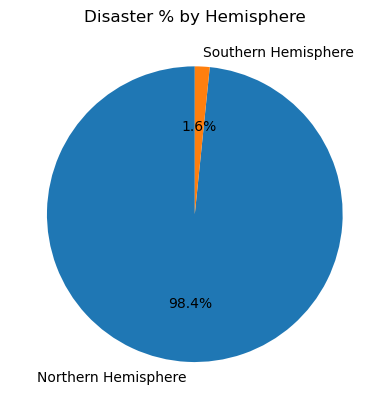

In [13]:
# Combine both counts into a single DataFrame
combined_counts = pd.DataFrame({'Northern Hemisphere': ndisaster_counts, 'Southern Hemisphere': sdisaster_counts})

# Create a pie chart
# plt.figure(figsize=(8, 8))
plt.pie(combined_counts.sum(), labels=combined_counts.columns, autopct='%1.1f%%', startangle=90)
plt.title('Disaster % by Hemisphere')

# Show the pie chart
plt.show()

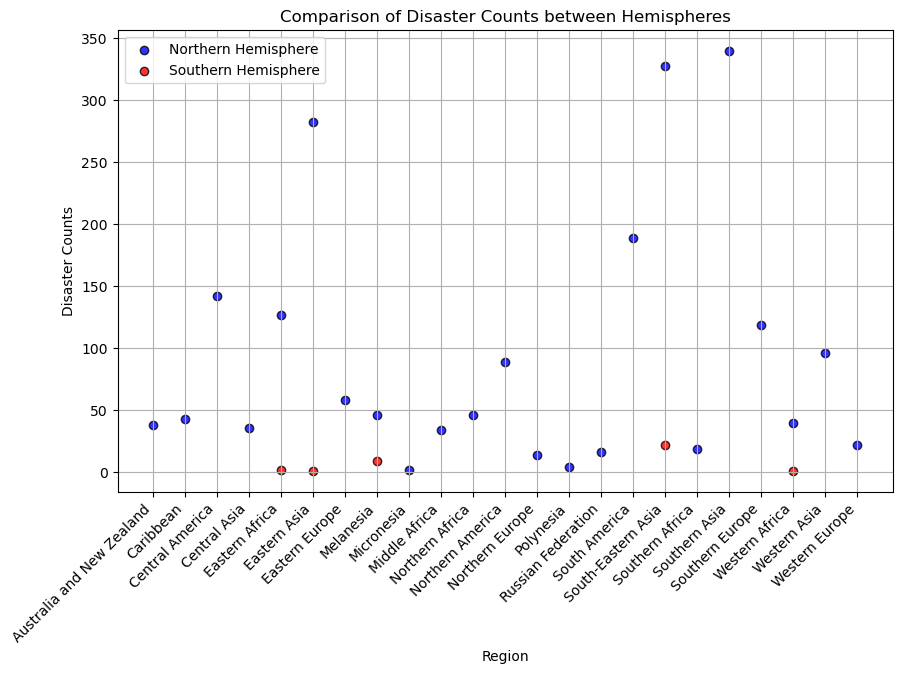

In [9]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Scatterplot for Northern Hemisphere
plt.scatter(combined_counts['Northern Hemisphere'].index, combined_counts['Northern Hemisphere'], 
            marker='o', color='blue', edgecolor='black', alpha=0.8, label='Northern Hemisphere')

# Scatterplot for Southern Hemisphere
plt.scatter(combined_counts['Southern Hemisphere'].index, combined_counts['Southern Hemisphere'], 
            marker='o', color='red', edgecolor='black', alpha=0.8, label='Southern Hemisphere')

plt.xlabel('Region')
plt.ylabel('Disaster Counts')
plt.title('Comparison of Disaster Counts between Hemispheres')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

---
## 3.	What is the correlation between natural disaster frequency and average temperatures over time?

Merge disaster and temp csv files to create Dataframe representing relative data.

One chart for Natural Disaster Frequency vs. Time (average yearly temp [monthly if we have time])

One chart for Average Temperatures (based on city data) vs. Time (average yearly temp [monthly if we have time])

Scatterplot combining these, including regression line to demonstrate correlation

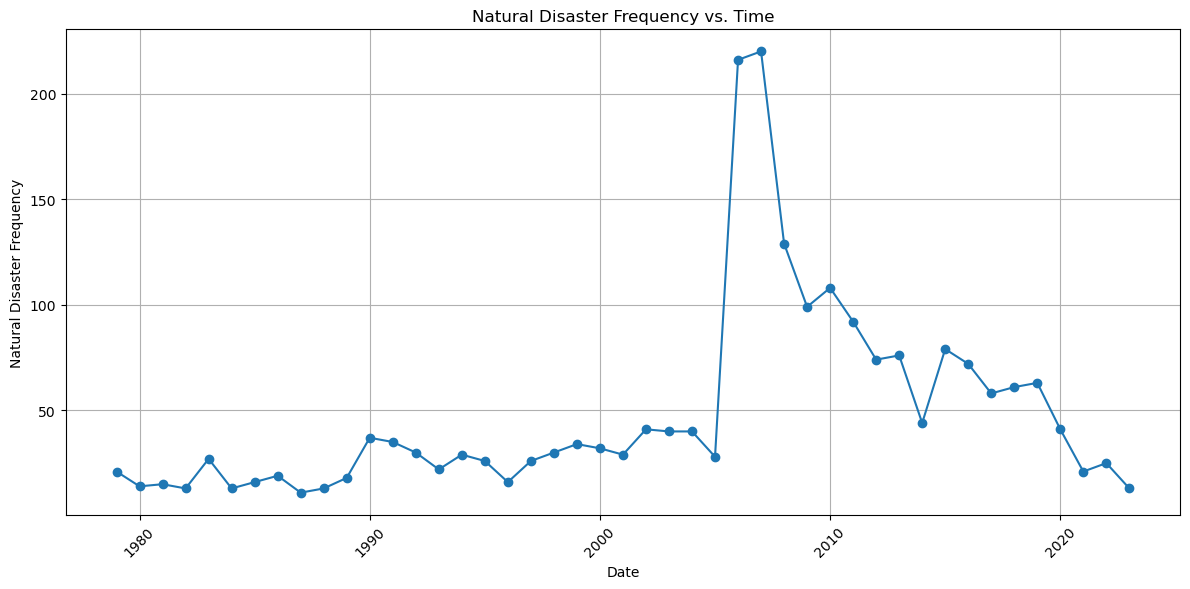

In [14]:
# Calculate the total disaster frequency for each date and region
disaster_counts = main_data_df.groupby(main_data_df['Year'])['Disaster Group'].count()

# Create a line chart
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.plot(disaster_counts.index, disaster_counts.values, marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Natural Disaster Frequency')
plt.title('Natural Disaster Frequency vs. Time')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

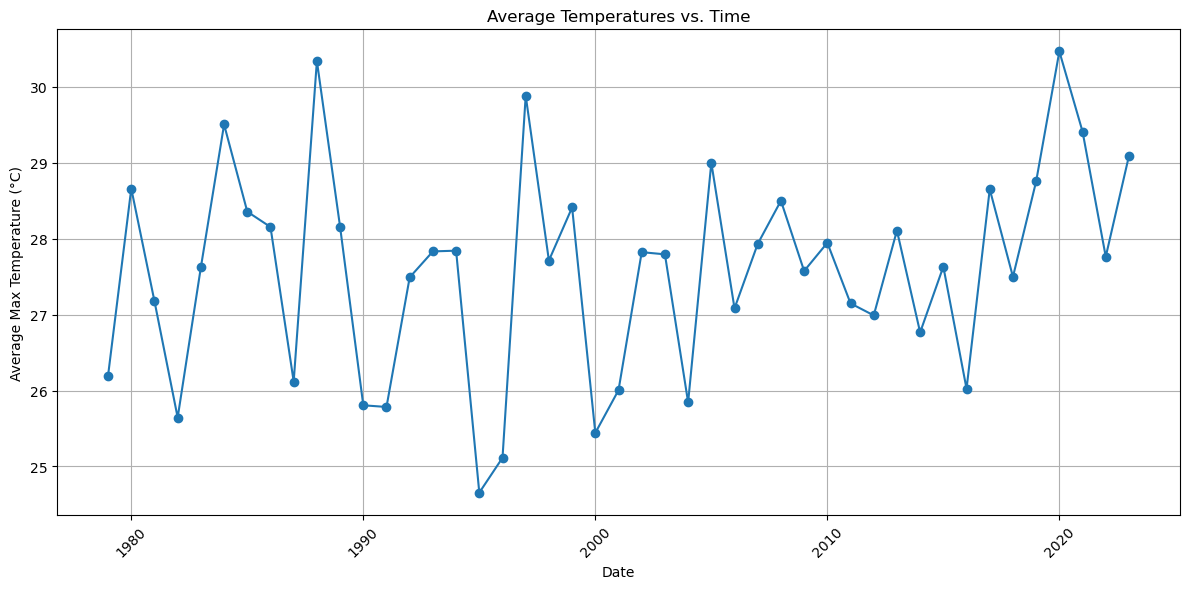

In [15]:
avg_temp_data = main_data_df.groupby(main_data_df['Year'])['Max Temp'].mean()

# Create a line chart for average temperatures vs. time
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.plot(avg_temp_data.index, avg_temp_data.values, marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Average Max Temperature (°C)')
plt.title('Average Temperatures vs. Time')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

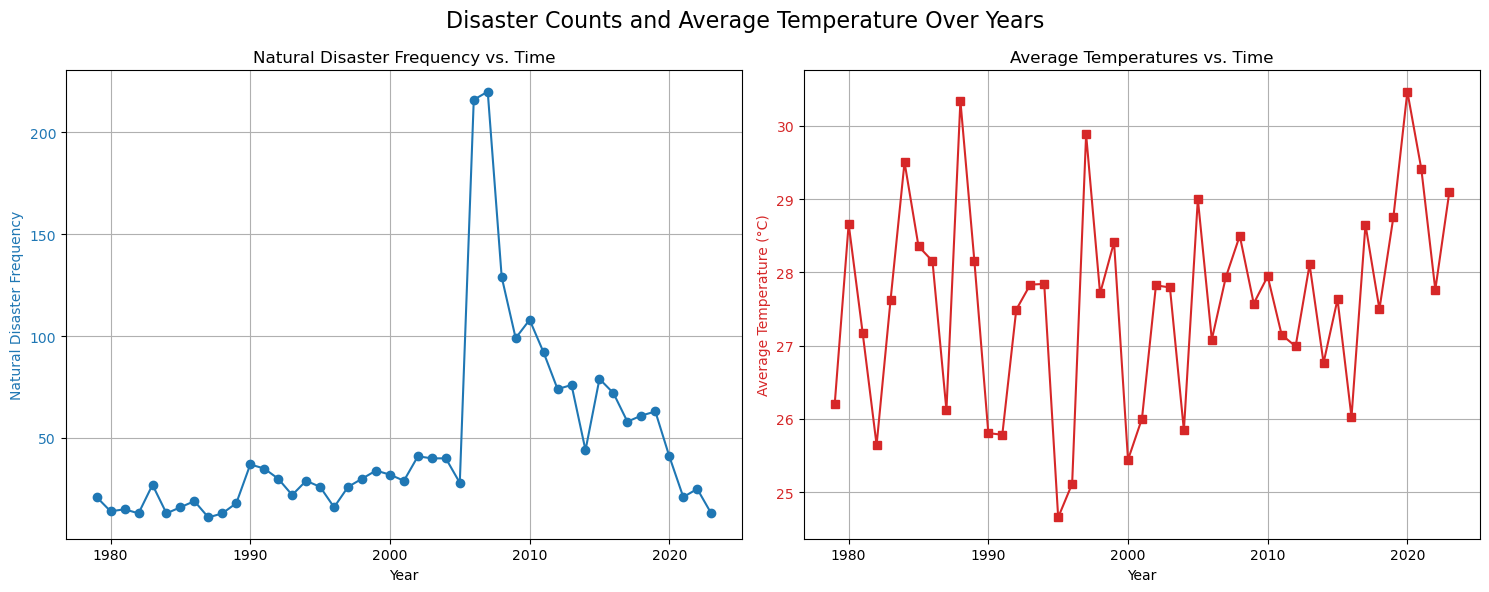

In [18]:
disaster_counts = main_data_df.groupby(main_data_df['Year'])['Disaster Group'].count()
avg_temp_data = main_data_df.groupby(main_data_df['Year'])['Max Temp'].mean()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot disaster counts in the first subplot
ax1.set_xlabel('Year')
ax1.set_ylabel('Natural Disaster Frequency', color='tab:blue')
ax1.plot(disaster_counts.index, disaster_counts.values, color='tab:blue', marker='o')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.grid()
ax1.set_title('Natural Disaster Frequency vs. Time')

# Plot average temperature in the second subplot
ax2.set_xlabel('Year')
ax2.set_ylabel('Average Temperature (°C)', color='tab:red')
ax2.plot(avg_temp_data.index, avg_temp_data.values, color='tab:red', marker='s')
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.grid()
ax2.set_title('Average Temperatures vs. Time')

# Add title and legend
plt.suptitle('Disaster Counts and Average Temperature Over Years', fontsize=16)
plt.subplots_adjust(wspace=0.3)  # Adjust the horizontal space between subplots

# Show the plot
plt.tight_layout()
plt.show()


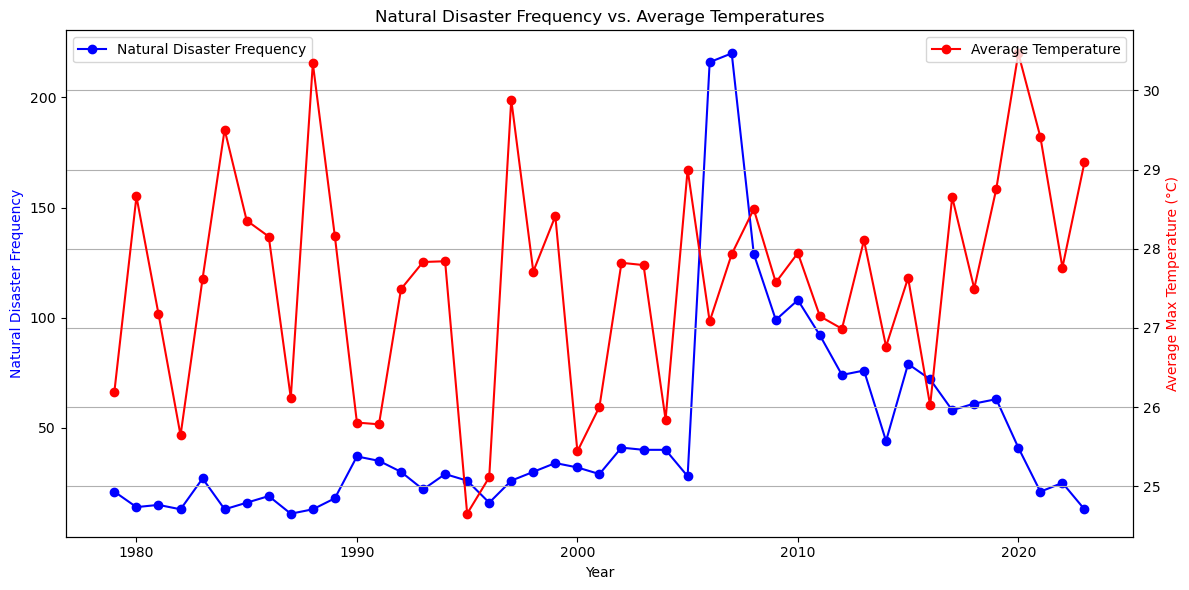

In [20]:
# Create a figure and the first subplot (Natural Disaster Frequency)
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the Natural Disaster Frequency data on the first subplot
ax1.plot(disaster_counts.index, disaster_counts.values, marker='o', linestyle='-', color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Natural Disaster Frequency', color='blue')
ax1.set_title('Natural Disaster Frequency vs. Average Temperatures')

# Create a second subplot that shares the same x-axis
ax2 = ax1.twinx()

# Plot the Average Temperatures data on the second subplot
ax2.plot(avg_temp_data.index, avg_temp_data.values, marker='o', linestyle='-', color='red')
ax2.set_ylabel('Average Max Temperature (°C)', color='red')

# Add a legend for each subplot
ax1.legend(['Natural Disaster Frequency'], loc='upper left')
ax2.legend(['Average Temperature'], loc='upper right')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

#Save the plot
plt.savefig("Resources/combinedDisastervsTemp.png")

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

The r-value is -0.0


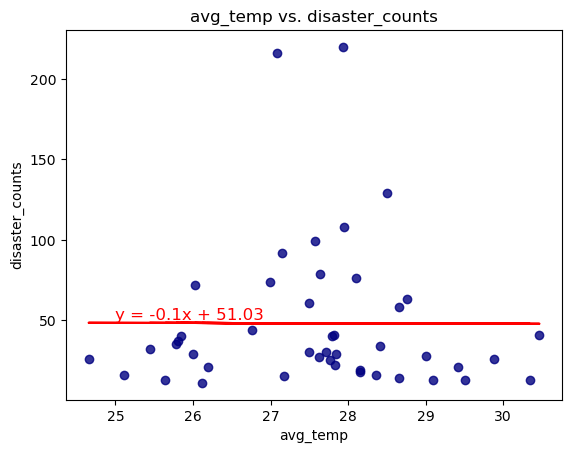

In [15]:
avg_temp_data = main_data_df.groupby(main_data_df['Year'])['Max Temp'].mean()
disaster_counts = main_data_df.groupby(main_data_df['Year'])['Disaster Group'].count()
plt.scatter(avg_temp_data, disaster_counts, marker='o', color='navy', alpha=0.8)
x_values = avg_temp_data
y_values =  disaster_counts
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
# Incorporate the other graph properties
plt.xlabel('avg_temp')
plt.ylabel('disaster_counts')
plt.title('avg_temp vs. disaster_counts')
print(f"The r-value is {round(rvalue,2)}")

# Show plot
plt.annotate(line_eq, (25, 50), fontsize=12, color='red')
plt.show()
# print(disaster_counts)
# print(avg_temp_data)

---
## 4.	What category of disaster is more likely to occur during specific seasons?

Use DataFrame from question 3 for this.

Number of disaster types within certain month range (eg: Dec-Feb for 'summer', Mar-May for 'Autumn' etc)

Breakdown the disaster type into hamesphere

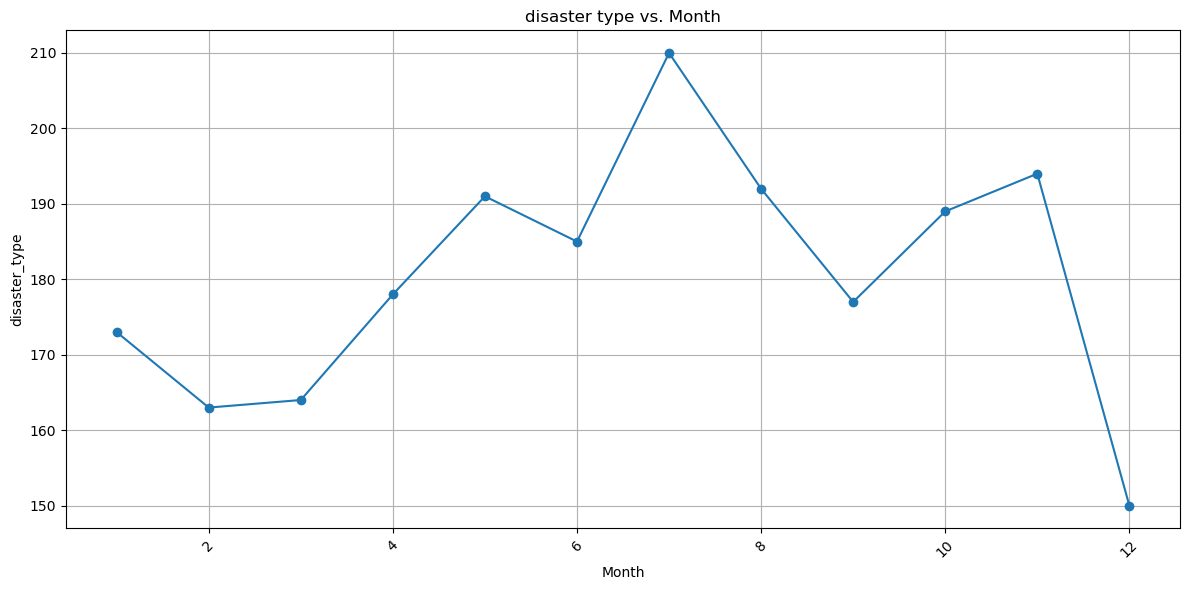

In [16]:
disaster_type_counts = main_data_df.groupby(main_data_df['Start Month'])['Disaster Type'].count()
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.plot(disaster_type_counts.index, disaster_type_counts.values, marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('disaster_type')
plt.title('disaster type vs. Month')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

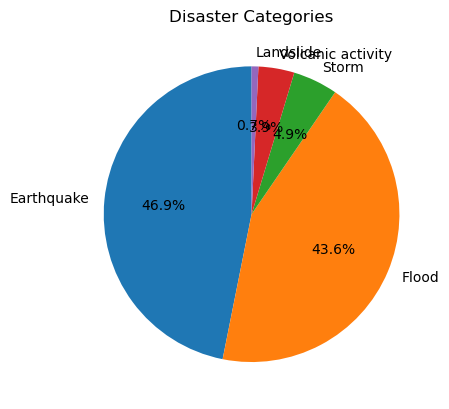

In [17]:
disaster_category_counts = main_data_df['Disaster Type'].value_counts()

# Create a pie chart
# plt.figure(figsize=(8, 8))
plt.pie(disaster_category_counts.values, labels=disaster_category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Disaster Categories')

# Show the pie chart
plt.show()

---
## 5.	Are there global hotspots for specific disaster categories?

Count number of natural disasters relating to different cities (aka Lat & Lon from Geofy API)

Dataframe that includes regions, types of disasters

Pie chart per disaster type

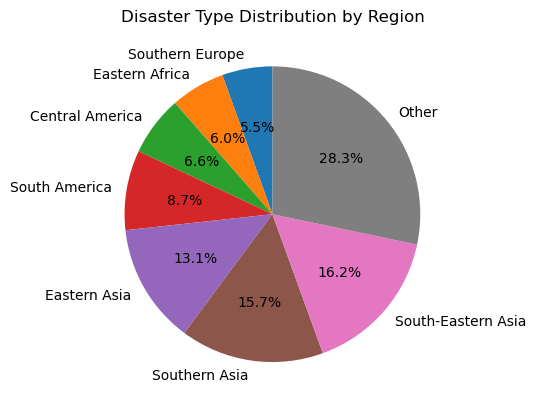

In [22]:
regiondisaster_type_counts = main_data_df.groupby(main_data_df['Region'])['Disaster Type'].count()


# Identify values below 10% of the total and group them into "Other"
threshold = 0.05 * regiondisaster_type_counts.sum()
small_categories = regiondisaster_type_counts[regiondisaster_type_counts < threshold]
regiondisaster_type_counts['Other'] = small_categories.sum()
regiondisaster_type_counts = regiondisaster_type_counts[regiondisaster_type_counts >= threshold]
# Sort the values in descending order
regiondisaster_type_counts = regiondisaster_type_counts.sort_values(ascending=True)

# plt.figure(figsize=(8, 8))
plt.pie(regiondisaster_type_counts.values, labels=regiondisaster_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Disaster Type Distribution by Region')

# Show the pie chart
plt.show()

---
## 6.	Has the frequency of natural disasters increased over the years? Are there any noticeable trends in different types of disasters (e.g., hurricanes, earthquakes, wildfires) over time?

Count number of natural disasters relating to time (yearly)

Dataframe that includes time, number of disasters, types of disasters

Line chart

In [23]:
# Group data by year and disaster type, and count the number of disasters for each type in each year
disaster_counts = main_data_df.groupby(['Year', 'Disaster Type']).size().reset_index(name='Count')

# Create a DataFrame to store the total number of disasters per year
total_disasters = disaster_counts.groupby('Year')['Count'].sum().reset_index()

# Merge the total_disasters DataFrame with the original disaster_counts DataFrame
merged_df = pd.merge(disaster_counts, total_disasters, on='Year', suffixes=('', '_Total'))

# Rename columns for clarity
merged_df = merged_df.rename(columns={'Count_Total': 'Total_Disasters'})

# Display the DataFrame
merged_df

,Year,Disaster Type,Count,Total_Disasters
0,1979,Earthquake,20,21
1,1979,Volcanic activity,1,21
2,1980,Earthquake,14,14
3,1981,Earthquake,15,15
4,1982,Earthquake,13,13
...,...,...,...,...
100,2020,Flood,24,41
101,2020,Storm,2,41
102,2021,Earthquake,21,21
103,2022,Earthquake,25,25


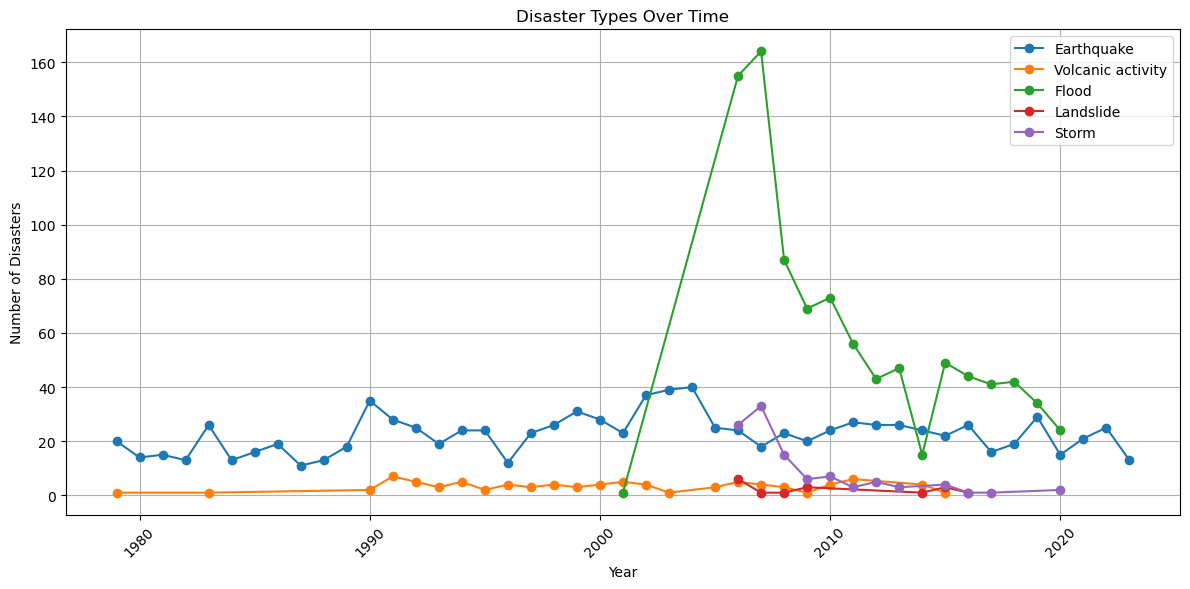

In [24]:
# Create a line chart with multiple lines
plt.figure(figsize=(12, 6))

# Create lines for each disaster type
for disaster_type in merged_df['Disaster Type'].unique():
    subset = merged_df[merged_df['Disaster Type'] == disaster_type]
    plt.plot(subset['Year'], subset['Count'], marker='o', label=disaster_type)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Number of Disasters')
plt.title('Disaster Types Over Time')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend
plt.legend()

#Save the plot
plt.savefig("Resources/disasterTypeOverTime.png")

# Show the line chart
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

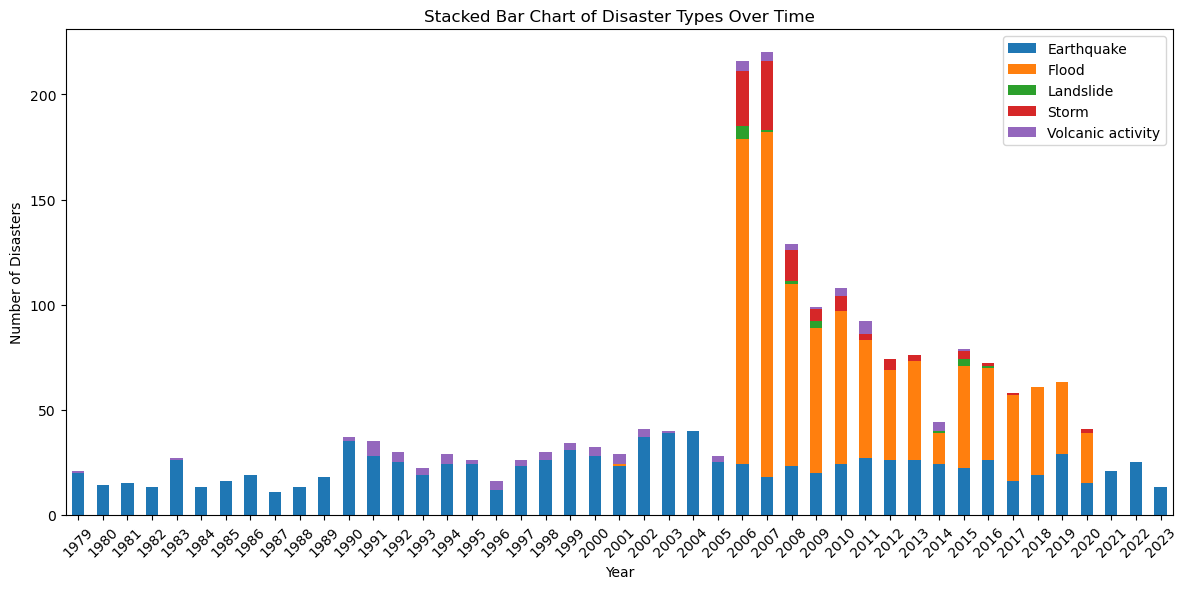

In [25]:
# Pivot the DataFrame to get disaster types as columns
stacked_disaster_df = merged_df.pivot(index='Year', columns='Disaster Type', values='Count').fillna(0)

# Create a stacked bar chart
plt.figure(figsize=(12, 6))

# Plot the stacked bars
stacked_disaster_df.plot(kind='bar', stacked=True, figsize=(12, 6))

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Number of Disasters')
plt.title('Stacked Bar Chart of Disaster Types Over Time')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Add a legend
plt.legend()

#Save the plot
plt.savefig("Resources/stackedBarChart.png")

# Show the stacked bar chart
plt.tight_layout()
plt.show()

---
## 7.	Rank of countries rated ‘safest’ and ‘most at risk’ (bonus)

In [26]:
# Group the data by 'Country' and count the number of disasters in each country
country_disaster_counts = main_data_df['Country'].value_counts().reset_index()
country_disaster_counts.columns = ['Country', 'Disaster Count']

# Sort the countries by disaster counts in ascending order
sorted_countries = country_disaster_counts.sort_values(by='Disaster Count', ascending=True)

# Select the top 10 countries with the least disaster counts
top_10_least_disasters = sorted_countries.head(10)

# Display the result
top_10_least_disasters

,Country,Disaster Count
100,DJ,1
83,CH,1
84,GU,1
85,RW,1
86,AE,1
87,NL,1
88,QA,1
89,HU,1
90,SY,1
99,TN,1


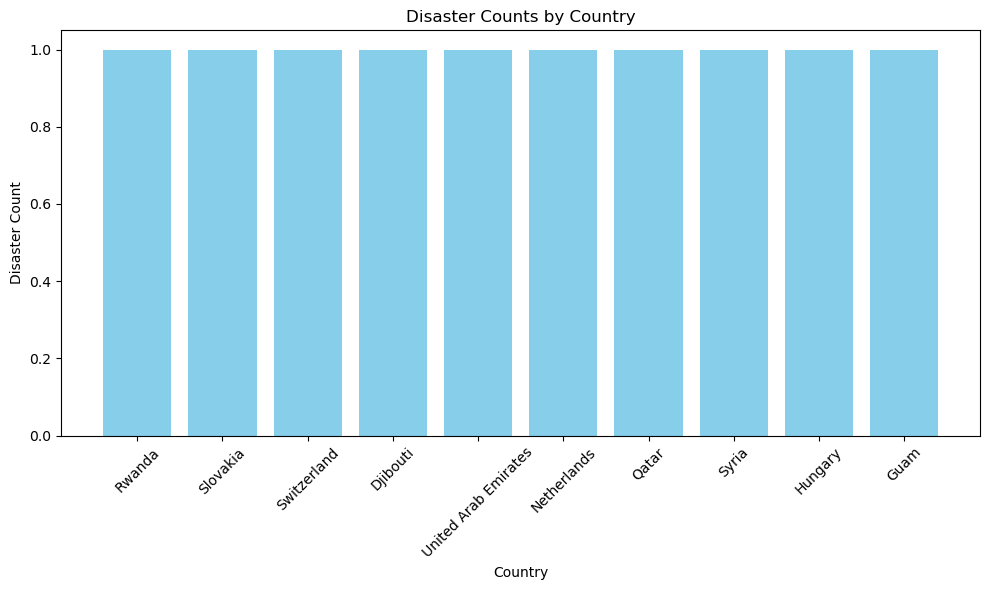

In [27]:
# Top 10 countries with least disaster numbers
data = {
    'Country': ['Rwanda', 'Slovakia', 'Switzerland', 'Djibouti', 'United Arab Emirates', 'Netherlands', 'Qatar', 'Syria', 'Hungary', 'Guam'],
    'Disaster Count': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(df['Country'], df['Disaster Count'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Disaster Count')
plt.title('Disaster Counts by Country')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the bar chart
plt.tight_layout()
plt.show()

In [28]:
# Group the data by 'Country' and count the number of disasters in each country
disaster_counts_by_country = main_data_df['Country'].value_counts()

# Sort the counts in descending order and select the top 10 countries
top_10_countries_most_disasters = disaster_counts_by_country.head(10)

# Create a DataFrame from the top 10 countries and their disaster counts
top_10_disaster_countries_df = pd.DataFrame({
    'Country': top_10_countries_most_disasters.index,
    'Number of Disasters': top_10_countries_most_disasters.values
})

# Display the DataFrame
top_10_disaster_countries_df

,Country,Number of Disasters
0,IN,260
1,CN,260
2,IR,112
3,PH,97
4,ID,87
5,JP,67
6,AF,62
7,LK,58
8,VN,57
9,RU,55


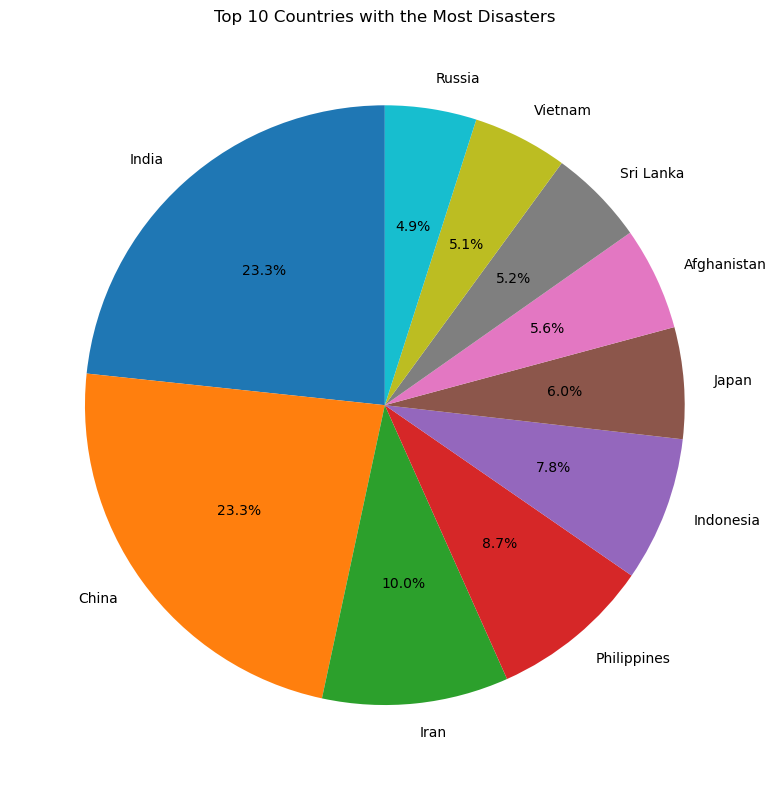

In [29]:
# Top 10 countries with the highest disaster numbers
data = {
    'Country': ['India', 'China', 'Iran', 'Philippines', 'Indonesia', 'Japan', 'Afghanistan', 'Sri Lanka', 'Vietnam', 'Russia'],
    'Number of Disasters': [260, 260, 112, 97, 87, 67, 62, 58, 57, 55]
}

# Create a DataFrame from the data
import pandas as pd
df = pd.DataFrame(data)

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(df['Number of Disasters'], labels=df['Country'], autopct='%1.1f%%', startangle=90)
plt.title('Top 10 Countries with the Most Disasters')

#Save the plot
plt.savefig("Resources/top10Pie.png")

# Show the pie chart
plt.tight_layout()
plt.show()

8- Create a map that displays a point for every city in the `main_data_df` DataFrame. The size of the point should be the Temp in each city.

In [53]:
# Configure the map plot
map_plot_1 = main_data_df.hvplot.points("Lng","Lat",geo = True,tiles = "OSM",scale =0.8,color = "Country",hover_cols=["Max Temp", "Country","Disaster Type"],tools=["hover"])
# Display the map
map_plot_1

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lng,Lat]   (Country,Max Temp,Disaster Type)